In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import numpy as np
from utils import Circle, LineSegment
from wire_position import wire_position
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy.solvers import solve
from sympy import Symbol

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
pts = np.array([[4.174, 1.646, 10.385], [11.83, 0.367, -2.094], [-11.812, 0.881, 2.343]])
inf_pro = np.array([28.869, -105.790, 61.966])
trigonum = np.array([-7.542, -90.675, -19.110])
wire_top = np.array([0.881, 37.306, 0.848])
intersection = np.array([1.000, -0.846, -0.372])
# pts = np.array([[1, 0, 0], [1, 1, 0], [9, 0, 1]])
circ = Circle(pts)
intersect, top, x_axis, y_axis, z_axis = wire_position(circ.circle_center, trigonum, inf_pro, intersection, wire_top)

print(f'2D center: {circ.x_off}, {circ.y_off}')
print(f'3D center: {circ.circle_center}')
print(f'2D points: {circ._pts_2D}')
print(f'wire intersection and top in local coords: {intersect} {top}')

2D center: 7.348054470402352, 9.574016580147335
3D center: [-0.17018875  0.52941228 -0.81932746]
2D points: [[ 0.00000000e+00  0.00000000e+00]
 [ 1.46961089e+01  8.43199734e-16]
 [-1.43264201e+00  1.78538153e+01]]
wire intersection and top in local coords: [ 0.87423759 -1.15823707 -1.16421564] [ 0.5774474   5.85880878 36.35578767]


In [41]:
z_ax = LineSegment(np.vstack((trigonum, circ.circle_center)))
print(z_ax.get_point_on_line(z_ax.segment_length + 10))
y_ax = LineSegment(np.array([-0.46067645, -0.06646055,  0.88507638]), circ.circle_center)
print(y_ax.get_point_on_line(10))
x_ax = LineSegment(np.array([-0.86466115, -0.19148544, -0.46442913]), circ.circle_center)
print(x_ax.get_point_on_line(10))

[ 0.61982839 10.30354332  1.14083461]
[-4.77695327 -0.13519322  8.03143636]
[-8.81680028 -1.38544212 -5.46361878]


<IPython.core.display.Javascript object>


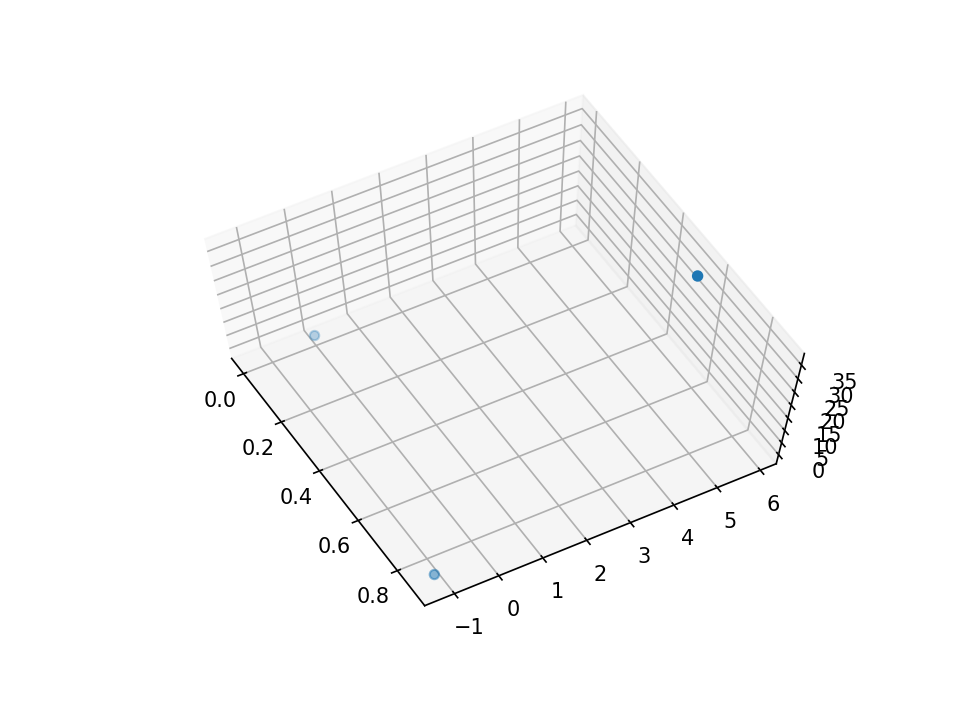

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d')
plt_points = np.vstack((np.array([0., 0., 0.]), intersect, top))
stack_ax = np.vstack((x_axis, y_axis, z_axis)) * 10
vec = LineSegment(np.vstack((intersection, wire_top)))
vec = vec.slope * vec.segment_length
# ax.quiver(*circ.circle_center, stack_ax[:, 0], stack_ax[:, 1], stack_ax[:, 2])
# ax.quiver(*circ.circle_center, vec[0], vec[1], vec[2])
ax.scatter(plt_points[:, 0], plt_points[:, 1], plt_points[:, 2])

<IPython.core.display.Javascript object>


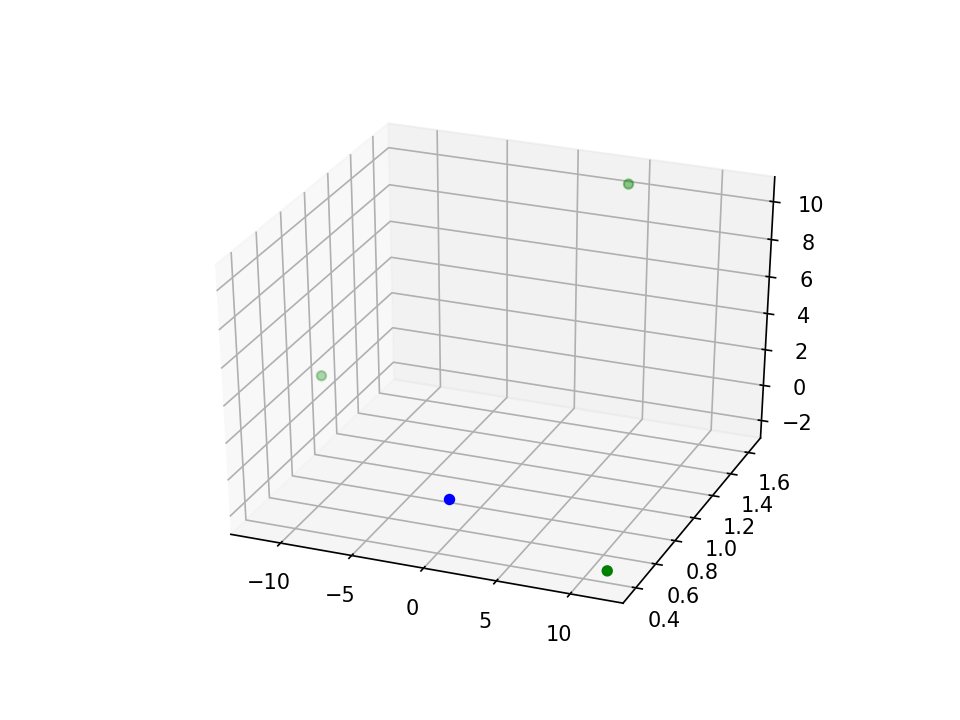

[-0.17018875  0.52941228 -0.81932746]


In [16]:
fig = plt.figure()
ax = fig.gca(projection='3d')
plot_pts = np.vstack((pts, circ.circle_center))
ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], c='green')
ax.scatter(circ.circle_center[0], circ.circle_center[1], circ.circle_center[2], c='blue')
print(circ.circle_center)

<IPython.core.display.Javascript object>


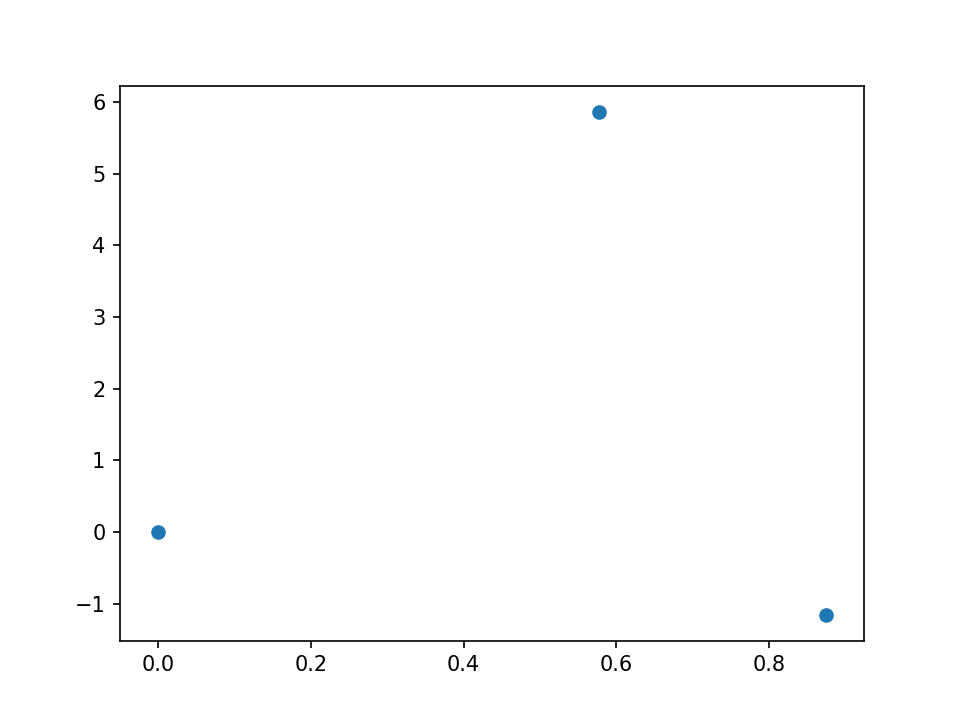

45.22274358281273


In [25]:
plt.figure()
plt.scatter(plt_points[:, 0], plt_points[:, 1])
vec = LineSegment(np.vstack((intersect, top)))
x_ang = np.arccos(np.dot(np.array([1, 0]), vec.slope[:2])) * 180 / (2 * np.pi)
print(x_ang)

<IPython.core.display.Javascript object>


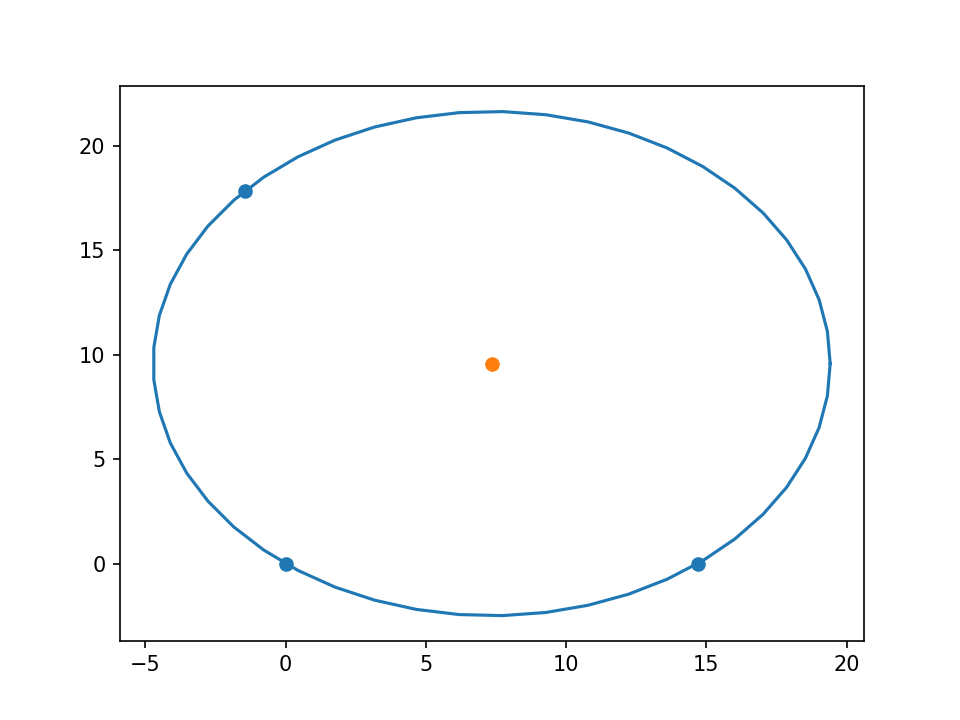

In [25]:
t = np.linspace(0, 2 * np.pi)
plt.figure()
plt.plot([circ.r * np.cos(theta) + circ.x_off for theta in t], [circ.r * np.sin(theta) + circ.y_off for theta in t])
plt.scatter(circ.pts_2D[:, 0], circ.pts_2D[:, 1])
plt.scatter(circ.x_off, circ.y_off)